# Import Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Import the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot a sample list of main pictures

In [4]:
sample_class_pics_indices = []

for i in range(10):
    
    sample_class_pics_indices.append(np.where(y_train == i)[0][0])
    

In [5]:
sample_class_pics_indices

[1, 16, 5, 3, 19, 8, 18, 6, 23, 0]

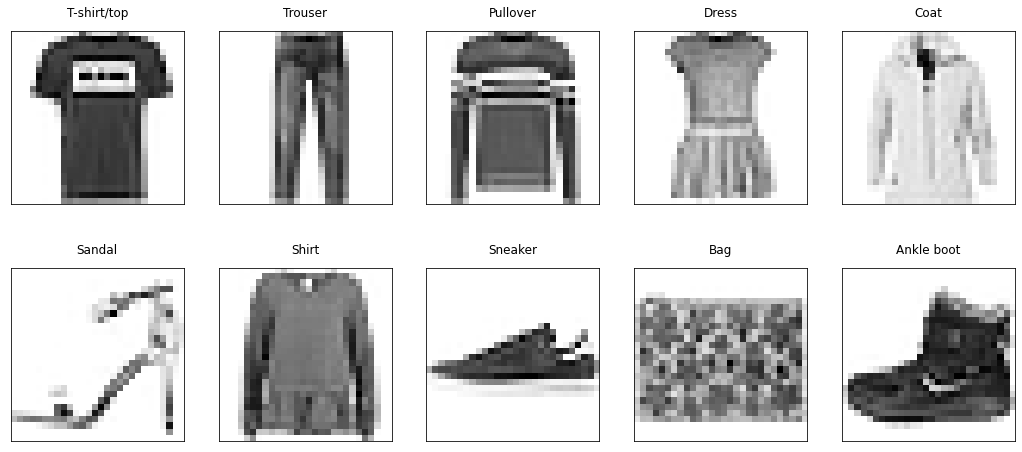

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (18,8))

for i in range(2):
    for j in range(5):
        axes[i,j].matshow(X_train[sample_class_pics_indices[5*i+j]], cmap='Greys')
        axes[i,j].set_title(class_names[5*i+j], y = 1.05)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        
plt.show()

# Scaling

In [7]:
X_train = X_train/255
X_test = X_test/255

# Building the Model

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(400, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 19s 7ms/step - loss: 0.4733 - accuracy: 0.8304
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3565 - accuracy: 0.8689
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3210 - accuracy: 0.8812
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2989 - accuracy: 0.8885
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2800 - accuracy: 0.8949
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2639 - accuracy: 0.9012
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2521 - accuracy: 0.9052
Epoch 8/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2419 - accuracy: 0.9087
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2335 - accuracy: 0.9119
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.8916


[0.37436553835868835, 0.8916000127792358]

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred.shape

(10000, 10)

In [13]:
y_pred_labels = [np.argmax(i) for i in y_pred]

# Confusion Matrix & Heatmap

In [14]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions=y_pred_labels)

confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[852,   1,  17,  25,   6,   1,  93,   0,   5,   0],
       [  4, 976,   0,  13,   3,   0,   3,   0,   1,   0],
       [ 14,   0, 828,   8, 105,   1,  42,   0,   2,   0],
       [ 21,   6,   7, 893,  47,   0,  22,   0,   4,   0],
       [  0,   0,  83,  21, 851,   0,  42,   0,   3,   0],
       [  0,   0,   1,   0,   0, 951,   0,  18,   2,  28],
       [120,   0, 104,  29,  76,   0, 658,   0,  13,   0],
       [  0,   0,   0,   0,   0,   6,   0, 951,   0,  43],
       [  2,   0,   3,   2,   6,   2,   2,   2, 980,   1],
       [  0,   0,   0,   0,   0,   4,   1,  19,   0, 976]])>

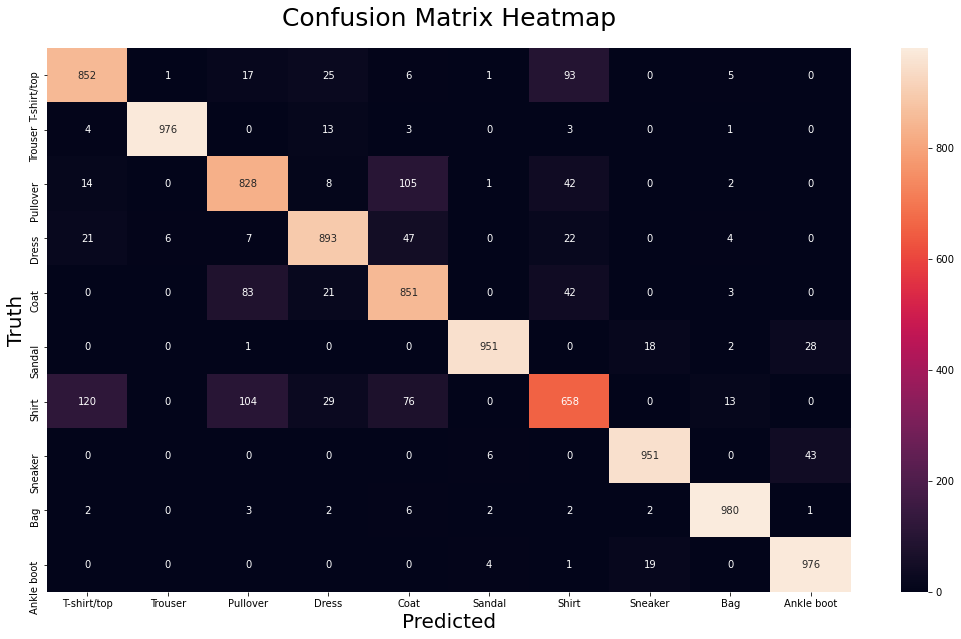

In [15]:
plt.figure(figsize = (18,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Truth', fontsize = 20)
plt.title('Confusion Matrix Heatmap', fontsize = 25, y=1.03)

plt.show()

# Wrong Predicted Labels & Conclusion

In [16]:
wrong_pred_labels = []
wrong_test_labels = []
for i, j in zip(y_test, y_pred_labels):
    if i != j:
        wrong_pred_labels.append(j)
        wrong_test_labels.append(i)

In [17]:
len(wrong_pred_labels)/len(y_test)

0.1084

In [18]:
wrong_class_counts = [wrong_test_labels.count(i) for i in range(10)]

In [19]:
wrong_class_counts

[148, 24, 172, 107, 149, 49, 342, 49, 20, 24]

In [20]:
print("WRONG CLASS PERCENTAGE \n")

for i in range(10):
    
    print(class_names[i]+':', round(wrong_class_counts[i]/sum(wrong_class_counts),2))


WRONG CLASS PERCENTAGE 

T-shirt/top: 0.14
Trouser: 0.02
Pullover: 0.16
Dress: 0.1
Coat: 0.14
Sandal: 0.05
Shirt: 0.32
Sneaker: 0.05
Bag: 0.02
Ankle boot: 0.02
